# solving 8 puzzle using A* algorithm 

Counting the number of inversions in the linear representation of the state using a modification of merge sort in O(nlogn) time.

In [107]:
def merge(arr, temp, left, right, mid):
    i = left
    j = mid+1
    k = left
    inv = 0 
    while i<=mid and j<=right :
        if arr[i] <= arr[j]: 
            temp[k] = arr[i] 
            k += 1
            i += 1
        else:
            temp[k] = arr[j] 
            inv += (mid-i + 1) 
            k += 1
            j += 1        
    while i <= mid : 
        temp[k] = arr[i] 
        k += 1
        i += 1     
    while j <= right: 
        temp[k] = arr[j] 
        k += 1
        j += 1
    for it in range(left, right + 1): 
        arr[it] = temp[it] 
    return inv
        
def mSort(array,temp, left, right):
    inv = 0
    if left<right:
        mid = (left+right)//2
        inv += mSort(array, temp,left, mid)
        inv += mSort(array, temp, mid+1, right)
        inv += merge(array, temp, left, right, mid)
    return inv

def countInv(array):
    temp = [0]*len(array)
    return mSort(array, temp, 0, len(array)-1)

Now we create a function to check the solvability of the particular instance

In [108]:
def isSolvable(start, end):
    start_line = []
    end_line = []
    for i in range(len(start)):
        if start[i]!=0 : start_line+=[start[i]]
        if end[i]!=0 : end_line+=[end[i]]
    sInv = countInv(start_line)
    eInv = countInv(end_line)
    if sInv%2==0 and eInv%2==0:
        return True
    elif sInv%2==1 and eInv%2==1:
        return True
    else: 
        return False


Now we will create 10 random instances which are reachable (i.e. solvable)

In [109]:
import random
import numpy as np

In [110]:
def generateInstance():
    start = list(range(9))
    random.shuffle(start)
    end = list(range(9))
    random.shuffle(end)
    while not isSolvable(start, end):
        random.shuffle(start)
        random.shuffle(end)
    return [start, end]

In [111]:
instances_start = []
instances_end = []
for iter in range(10):
    s = generateInstance()[0]
    e = generateInstance()[1]
    instances_start.append(np.matrix(s).reshape(3,3))
    instances_end.append(np.matrix(e).reshape(3,3))

now my 10 instances are ready, lets code the A* algorithm to make it solve the game

In [112]:
from queue import PriorityQueue
import heapq
class Node:
    def __init__(self, state, parent, move, h, g):
        self.state = state
        self.parent = parent
        self.move = move
        self.h = h
        self.g = g
        self.f = self.h + self.g
    def __lt__(self, other):
        return self.f < other.f
    def __eq__(self, other):
        if Node == None or other == None:
            return False
        return self.f == other.f

def getUnique(state):
    s = ""
    for i in range(3):
        for j in range(3):
            s+=str(state[i,j].item())
    return s

def checkEq(state1, states):
    for iter in states:
        for i in range(3):
            for j in range(3):
                if state1[i,j]!=iter[i,j]:
                    return False
    return True

def createState(state, move, i, j):
    newstate = np.copy(state)
    if move == 'u' :
        newstate[i,j] = newstate[i-1,j]
        newstate[i-1,j] = 0
    elif move == 'd' :
        newstate[i,j] = newstate[i+1,j]
        newstate[i+1,j] = 0
    elif move == 'l' :
        newstate[i,j] = newstate[i,j-1]
        newstate[i,j-1] = 0
    elif move == 'r' :
        newstate[i,j] = newstate[i,j+1]
        newstate[i,j+1] = 0
    return newstate

def getNeighbors(node, heuristicFunc, end_state):
    neighbors = []
    pmove = node.move
    pstate = node.state
    for i in range(3):
        for j in range(3):
            if pstate[i,j] == 0:
                if i>0 and pmove!='d':
                    newstate = createState(pstate, 'u', i, j)
                    neighbors.append(Node(newstate, node, 'u', heuristicFunc(newstate, end_state), node.g+1))
                if i<2 and pmove!='u':
                    newstate = createState(pstate, 'd', i, j)
                    neighbors.append(Node(newstate, node, 'd', heuristicFunc(newstate, end_state), node.g+1))
                if j>0 and pmove!='r':
                    newstate = createState(pstate, 'l', i, j)
                    neighbors.append(Node(newstate, node, 'l', heuristicFunc(newstate, end_state), node.g+1))
                if j<2 and pmove!='l':
                    newstate = createState(pstate, 'r', i, j)
                    neighbors.append(Node(newstate, node, 'r', heuristicFunc(newstate, end_state), node.g+1))
    return neighbors

def getPath(end_node):
    path = []
    current_node = end_node
    while current_node!= None and current_node.parent != None:
        path.append(current_node.state)
        current_node = current_node.parent
    path.reverse()
    return path
    
def createNode (state, parent, move, h, g):
    return Node(state, parent, move, h, g)


In [73]:

def a_star1(start, end, heuristicFunc):
    start_node = createNode(start, None, None, heuristicFunc(start, end), 0)
    q = PriorityQueue()
    q.put(start_node)
    start_key = getUnique(start_node.state)
    end_key = getUnique(end)
    explored = set()
    open = set()
    opend = {}
    opend.update({start_key: start_node.g})
    replace  = {}
    open.add(start_key)
    while not q.empty():
        current_node = q.get()
        current_key = getUnique(current_node.state)
        open.remove(current_key)
        opend.pop(current_key)
        if current_key in replace:
            g = replace[current_key]
            replace.pop(current_key)
            open.add(current_key)
            opend.update({current_key: g})
        explored.add(current_key)
        if end_key == current_key:
            return current_node
        neighbors = getNeighbors(current_node, heuristicFunc, end)
        for neighbor in neighbors:
            neighbor_key = getUnique(neighbor.state)
            if (neighbor_key not in explored) and (neighbor_key not in open):
                q.put(neighbor)
                open.add(neighbor_key)
                opend.update({neighbor_key: neighbor.g})
            elif neighbor_key in open:
                if opend[neighbor_key] > neighbor.g:
                    replace.update({neighbor_key: neighbor.g})
                    q.put(neighbor)
                    opend.update({neighbor_key: neighbor.g})
                    
                    
    return None
    

In [113]:
def a_star(start, end, heuristicFunc):
    start_node = createNode(start, None, None, heuristicFunc(start, end), 0)
    # q = PriorityQueue()
    q = []
    def put(node):
        heapq.heappush(q, node)
        #q.append(node)
        #q.sort(key = lambda x: x.f)
    def get():
        if not q:
            return None
        return heapq.heappop(q)
        #return q.pop(0)
    put(start_node)
    #q.append(start_node)
    start_key = getUnique(start_node.state)
    end_key = getUnique(end)
    explored = set()
    open = set()
    opend = {}
    opend.update({start_key: start_node.g})
    #replace  = {}
    open.add(start_key)
    while len(q)!=0:
        #q.sort(key = lambda x: x.f)
        #heapq.heapify(q)
        current_node = get()
        current_key = getUnique(current_node.state)
        open.remove(current_key)
        opend.pop(current_key)
        #if current_key in replace:
        #    g = replace[current_key]
        #    replace.pop(current_key)
        #    open.add(current_key)
        #    opend.update({current_key: g})
        explored.add(current_key)
        if end_key == current_key:
            return current_node
        neighbors = getNeighbors(current_node, heuristicFunc, end)
        for neighbor in neighbors:
            neighbor_key = getUnique(neighbor.state)
            if (neighbor_key not in explored) and (neighbor_key not in open):
                put(neighbor)
                #q.append(neighbor)
                open.add(neighbor_key)
                opend.update({neighbor_key: neighbor.g})
            elif neighbor_key in open:
                if opend[neighbor_key] > neighbor.g:
                    #replace.update({neighbor_key: neighbor.g})
                    for i in range(len(q)):
                        if getUnique(q[i].state) == getUnique(neighbor.state):
                            ind = i
                            break
                    q.pop(ind)
                    put(neighbor)
                    #q.append(neighbor)
                    opend.update({neighbor_key: neighbor.g})
                    
                    
    return None
    

defining different heuristic functions to calculate heuristics

In [114]:
def misplacedTiles(state, end):
    h = 0
    for i in range(3):
        for j in range(3):
            if state[i,j] != end[i,j] and state[i,j]!=0:
                h += 1
            
    return h

def manhattanDistance(state, end):
    h = 0
    for i in range(3):
        for j in range(3):
            for k in range(3):
                for l in range(3):
                    if state[i,j] == end[k,l]:
                        h += abs(i-k) + abs(j-l)
    return h

def euclidean(state, end):
    h = 0
    for i in range(3):
        for j in range(3):
            for k in range(3):
                for l in range(3):
                    if state[i,j] == end[k,l]:
                        h += ((i-k)**2 + (j-l)**2)**0.5
    return h

def customHeuristic1(state,end):
    h=0
    h+=0.6*manhattanDistance(state,end)
    h+=0.1*misplacedTiles(state,end)
    h+=0.3*euclidean(state,end)
    return h


Program output for one instance

In [115]:
initial_state = instances_start[0]
end_state = instances_end[0]
print("Initial state:")
print(initial_state)
print("End state:")
print(end_state)
print("\n")
print("Misplaced tiles heuristic:")
end_node_1 = a_star(initial_state, end_state, misplacedTiles)
path1 = getPath(end_node_1)
for i in range(len(path1)):
    print(path1[i])
print("\n")
print("manhattanDistance heuristic: ")
end_node_2 = a_star(initial_state, end_state, manhattanDistance)
path2 = getPath(end_node_2)
for i in range(len(path2)):
    print(path2[i])
print("\n")
print("euclidean distance heuristic: ")
end_node_3 = a_star(initial_state, end_state, euclidean)
path3 = getPath(end_node_3)
for i in range(len(path3)):
    print(path3[i])
print("\n")
print("custom heuristic using weights and all three of the above heuristics: ")
end_node_4 = a_star(initial_state, end_state, customHeuristic1)
path4 = getPath(end_node_4)
for i in range(len(path4)):
    print(path4[i])
    

Initial state:
[[2 6 5]
 [0 4 3]
 [8 7 1]]
End state:
[[6 4 1]
 [3 8 7]
 [0 2 5]]


Misplaced tiles heuristic:
[[0 6 5]
 [2 4 3]
 [8 7 1]]
[[6 0 5]
 [2 4 3]
 [8 7 1]]
[[6 4 5]
 [2 0 3]
 [8 7 1]]
[[6 4 5]
 [2 3 0]
 [8 7 1]]
[[6 4 0]
 [2 3 5]
 [8 7 1]]
[[6 0 4]
 [2 3 5]
 [8 7 1]]
[[6 3 4]
 [2 0 5]
 [8 7 1]]
[[6 3 4]
 [2 5 0]
 [8 7 1]]
[[6 3 4]
 [2 5 1]
 [8 7 0]]
[[6 3 4]
 [2 5 1]
 [8 0 7]]
[[6 3 4]
 [2 0 1]
 [8 5 7]]
[[6 0 4]
 [2 3 1]
 [8 5 7]]
[[6 4 0]
 [2 3 1]
 [8 5 7]]
[[6 4 1]
 [2 3 0]
 [8 5 7]]
[[6 4 1]
 [2 3 7]
 [8 5 0]]
[[6 4 1]
 [2 3 7]
 [8 0 5]]
[[6 4 1]
 [2 3 7]
 [0 8 5]]
[[6 4 1]
 [0 3 7]
 [2 8 5]]
[[6 4 1]
 [3 0 7]
 [2 8 5]]
[[6 4 1]
 [3 8 7]
 [2 0 5]]
[[6 4 1]
 [3 8 7]
 [0 2 5]]


manhattanDistance heuristic: 
[[0 6 5]
 [2 4 3]
 [8 7 1]]
[[6 0 5]
 [2 4 3]
 [8 7 1]]
[[6 4 5]
 [2 0 3]
 [8 7 1]]
[[6 4 5]
 [2 3 0]
 [8 7 1]]
[[6 4 0]
 [2 3 5]
 [8 7 1]]
[[6 0 4]
 [2 3 5]
 [8 7 1]]
[[6 3 4]
 [2 0 5]
 [8 7 1]]
[[6 3 4]
 [2 5 0]
 [8 7 1]]
[[6 3 4]
 [2 5 1]
 [8 7 0]]
[[6 3 4]
 [2 5 1]

Program output for another instance

In [116]:
initial_state = instances_start[1]
end_state = instances_end[1]
print("Initial state:")
print(initial_state)
print("End state:")
print(end_state)
print("\n")
print("Misplaced tiles heuristic:")
end_node_1 = a_star(initial_state, end_state, misplacedTiles)
path1 = getPath(end_node_1)
for i in range(len(path1)):
    print(path1[i])
print("\n")
print("manhattanDistance heuristic: ")
end_node_2 = a_star(initial_state, end_state, manhattanDistance)
path2 = getPath(end_node_2)
for i in range(len(path2)):
    print(path2[i])
print("\n")
print("euclidean distance heuristic: ")
end_node_3 = a_star(initial_state, end_state, euclidean)
path3 = getPath(end_node_3)
for i in range(len(path3)):
    print(path3[i])
print("\n")
print("custom heuristic using weights and all three of the above heuristics: ")
end_node_4 = a_star(initial_state, end_state, customHeuristic1)
path4 = getPath(end_node_4)
for i in range(len(path4)):
    print(path4[i])
    

Initial state:
[[3 6 7]
 [2 5 1]
 [4 0 8]]
End state:
[[6 8 5]
 [0 4 3]
 [7 2 1]]


Misplaced tiles heuristic:
[[3 6 7]
 [2 5 1]
 [4 8 0]]
[[3 6 7]
 [2 5 0]
 [4 8 1]]
[[3 6 7]
 [2 0 5]
 [4 8 1]]
[[3 6 7]
 [2 8 5]
 [4 0 1]]
[[3 6 7]
 [2 8 5]
 [0 4 1]]
[[3 6 7]
 [0 8 5]
 [2 4 1]]
[[0 6 7]
 [3 8 5]
 [2 4 1]]
[[6 0 7]
 [3 8 5]
 [2 4 1]]
[[6 8 7]
 [3 0 5]
 [2 4 1]]
[[6 8 7]
 [0 3 5]
 [2 4 1]]
[[0 8 7]
 [6 3 5]
 [2 4 1]]
[[8 0 7]
 [6 3 5]
 [2 4 1]]
[[8 7 0]
 [6 3 5]
 [2 4 1]]
[[8 7 5]
 [6 3 0]
 [2 4 1]]
[[8 7 5]
 [6 0 3]
 [2 4 1]]
[[8 0 5]
 [6 7 3]
 [2 4 1]]
[[0 8 5]
 [6 7 3]
 [2 4 1]]
[[6 8 5]
 [0 7 3]
 [2 4 1]]
[[6 8 5]
 [7 0 3]
 [2 4 1]]
[[6 8 5]
 [7 4 3]
 [2 0 1]]
[[6 8 5]
 [7 4 3]
 [0 2 1]]
[[6 8 5]
 [0 4 3]
 [7 2 1]]


manhattanDistance heuristic: 
[[3 6 7]
 [2 5 1]
 [4 8 0]]
[[3 6 7]
 [2 5 0]
 [4 8 1]]
[[3 6 7]
 [2 0 5]
 [4 8 1]]
[[3 6 7]
 [2 8 5]
 [4 0 1]]
[[3 6 7]
 [2 8 5]
 [0 4 1]]
[[3 6 7]
 [0 8 5]
 [2 4 1]]
[[0 6 7]
 [3 8 5]
 [2 4 1]]
[[6 0 7]
 [3 8 5]
 [2 4 1]]
[[6 8 7]
 [3 0 5]

In [117]:
def a_star_with_node_record1(start, end, heuristicFunc):
    start_node = createNode(start, None, None, heuristicFunc(start, end), 0)
    q = PriorityQueue()
    q.put(start_node)
    start_key = getUnique(start_node.state)
    end_key = getUnique(end)
    explored = set()
    open = set()
    opend = {}
    opend.update({start_key: start_node.g})
    replace  = {}
    open.add(start_key)
    while not q.empty():
        current_node = q.get()
        current_key = getUnique(current_node.state)
        open.remove(current_key)
        opend.pop(current_key)
        if current_key in replace:
            g = replace[current_key]
            replace.pop(current_key)
            open.add(current_key)
            opend.update({current_key: g})
        explored.add(current_key)
        if end_key == current_key:
            return [current_node, len(explored), len(open)]
        neighbors = getNeighbors(current_node, heuristicFunc, end)
        for neighbor in neighbors:
            neighbor_key = getUnique(neighbor.state)
            if (neighbor_key not in explored) and (neighbor_key not in open):
                q.put(neighbor)
                open.add(neighbor_key)
                opend.update({neighbor_key: neighbor.g})
            elif neighbor_key in open:
                if opend[neighbor_key] > neighbor.g:
                    replace.update({neighbor_key: neighbor.g})
                    q.put(neighbor)
                    opend.update({neighbor_key: neighbor.g})
                    
                    
    return None

In [120]:
def a_star_with_node_record(start,end,heuristicFunc):
    max_iter = 10000
    start_node = createNode(start, None, None, heuristicFunc(start, end), 0)
    q = []
    def put(node):
        heapq.heappush(q, node)
    def get():
        if not q:
            return None
        return heapq.heappop(q)
    put(start_node)
    start_key = getUnique(start_node.state)
    end_key = getUnique(end)
    explored = set()
    open = set()
    opend = {}
    opend.update({start_key: start_node.g})
    open.add(start_key)
    iter = 0
    while len(q)!=0 and iter<max_iter:
        iter+=1
        current_node = get()
        current_key = getUnique(current_node.state)
        open.remove(current_key)
        opend.pop(current_key)
        explored.add(current_key)
        if end_key == current_key:
            #print(1)
            return [current_node, len(explored), len(open)]
        neighbors = getNeighbors(current_node, heuristicFunc, end)
        for neighbor in neighbors:
            neighbor_key = getUnique(neighbor.state)
            if (neighbor_key not in explored) and (neighbor_key not in open):
                put(neighbor)
                open.add(neighbor_key)
                opend.update({neighbor_key: neighbor.g})
            elif neighbor_key in open:
                if opend[neighbor_key] > neighbor.g:
                    for i in range(len(q)):
                        if getUnique(q[i].state) == getUnique(neighbor.state):
                            ind = i
                            break
                    q.pop(ind)
                    put(neighbor)
                    opend.update({neighbor_key: neighbor.g})
                    
                    
    return None
    

In [121]:
# running the code for 10 instances and recording the number of nodes expanded, number of nodes removed from the frontier, 
# the time taken for each heuristic and the path length for each heuristic
import time

times = []
nodes_expanded = []
nodes_removed = []
path_length = []

for i in range(10):
    print(i)
    start = instances_start[i]
    end = instances_end[i]
    
    start_time = time.time()
    ans1 = a_star_with_node_record(start, end, misplacedTiles)
    if ans1!=None:
        end_node_1, nodes_removed_1, nodes_open_1 = ans1
    end_time = time.time()
    time_1 = end_time - start_time
    
    start_time = time.time()
    ans2 = a_star_with_node_record(start, end, manhattanDistance)
    if ans2!=None:
        end_node_2, nodes_removed_2, nodes_open_2 = ans2
    end_time = time.time()
    time_2 = end_time - start_time
    
    start_time = time.time()
    ans3 = a_star_with_node_record(start, end, euclidean)
    if ans3!=None:
        end_node_3, nodes_removed_3, nodes_open_3 = ans3
    end_time = time.time()
    time_3 = end_time - start_time
    
    start_time = time.time()
    ans4 = a_star_with_node_record(start, end, customHeuristic1)
    if ans4!=None:
        end_node_4, nodes_removed_4, nodes_open_4 = ans4
    end_time = time.time()
    time_4 = end_time - start_time
    
    times.append([time_1, time_2, time_3, time_4])
    nodes_expanded.append([nodes_open_1, nodes_open_2, nodes_open_3, nodes_open_4])
    nodes_removed.append([nodes_removed_1, nodes_removed_2, nodes_removed_3, nodes_removed_4])
    path_length.append([len(getPath(end_node_1)), len(getPath(end_node_2)), len(getPath(end_node_3)), len(getPath(end_node_4))])


0
1
2
3
4
5
6
7
8
9


In [122]:
for i in times:
    print(i)

[0.21968412399291992, 0.05971693992614746, 0.08030200004577637, 0.13156414031982422]
[0.5763833522796631, 0.042324066162109375, 0.07910895347595215, 0.11413216590881348]
[0.7855911254882812, 5.701487064361572, 4.7190940380096436, 5.440924882888794]
[0.5880522727966309, 0.18426108360290527, 1.5691888332366943, 0.9341700077056885]
[0.9249558448791504, 6.026312828063965, 5.423182964324951, 6.209234237670898]
[0.7594430446624756, 6.757370233535767, 4.7360029220581055, 6.031090974807739]
[0.4645969867706299, 0.12553715705871582, 0.19025087356567383, 0.2218320369720459]
[0.2190699577331543, 0.035653114318847656, 0.07460808753967285, 0.10047793388366699]
[0.01358795166015625, 0.0031452178955078125, 0.008211135864257812, 0.009588003158569336]
[0.1204519271850586, 0.04000425338745117, 0.06102609634399414, 0.09114480018615723]


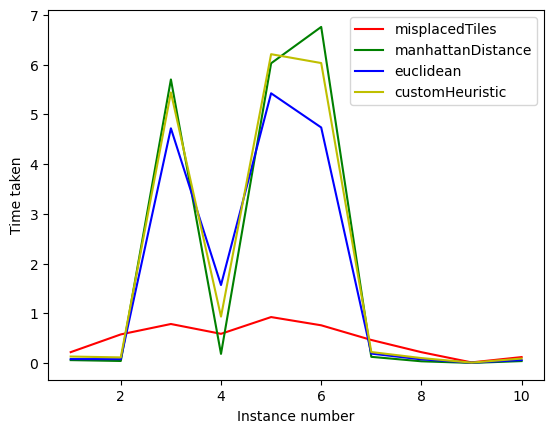

In [123]:
import matplotlib.pyplot as plt
xpoints = [1,2,3,4,5,6,7,8,9,10]
misplacedTiles = []
manhattanDistance = []
euclidean = []
customHeuristic = []
for i in range(10):
    misplacedTiles.append(times[i][0])
    manhattanDistance.append(times[i][1])
    euclidean.append(times[i][2])
    customHeuristic.append(times[i][3])
plt.plot(xpoints, misplacedTiles, color = 'r',label = "misplacedTiles")
plt.plot(xpoints, manhattanDistance,color='g', label = "manhattanDistance")
plt.plot(xpoints, euclidean, color='b',label = "euclidean")
plt.plot(xpoints, customHeuristic,color='y', label = "customHeuristic")
plt.legend()
plt.xlabel("Instance number")
plt.ylabel("Time taken")
plt.show()


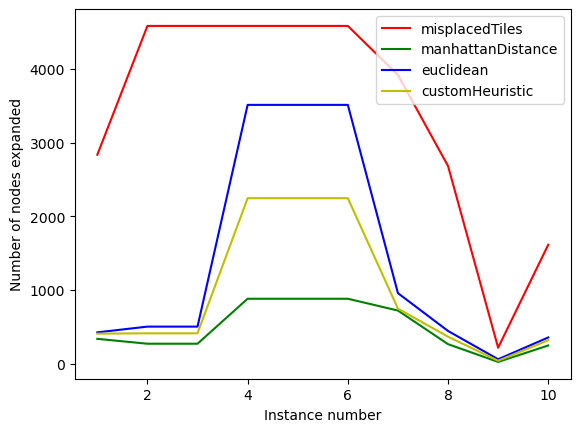

In [124]:
# plotting the number of nodes expanded for each heuristic
xpoints = [1,2,3,4,5,6,7,8,9,10]
misplacedTiles = []
manhattanDistance = []
euclidean = []
customHeuristic = []
for i in range(10):
    misplacedTiles.append(nodes_expanded[i][0])
    manhattanDistance.append(nodes_expanded[i][1])
    euclidean.append(nodes_expanded[i][2])
    customHeuristic.append(nodes_expanded[i][3])
plt.plot(xpoints, misplacedTiles, color = 'r',label = "misplacedTiles")
plt.plot(xpoints, manhattanDistance,color='g', label = "manhattanDistance")
plt.plot(xpoints, euclidean, color='b',label = "euclidean")
plt.plot(xpoints, customHeuristic,color='y', label = "customHeuristic")
plt.legend()
plt.xlabel("Instance number")
plt.ylabel("Number of nodes expanded")
plt.show()

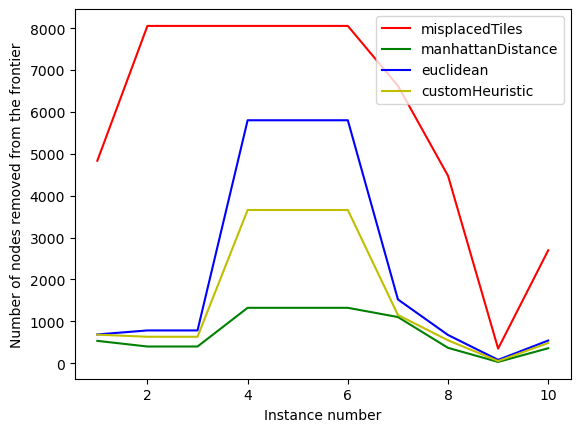

In [125]:
# plotting the number of nodes removed from the frontier for each heuristic
xpoints = [1,2,3,4,5,6,7,8,9,10]
misplacedTiles = []
manhattanDistance = []
euclidean = []
customHeuristic = []
for i in range(10):
    misplacedTiles.append(nodes_removed[i][0])
    manhattanDistance.append(nodes_removed[i][1])
    euclidean.append(nodes_removed[i][2])
    customHeuristic.append(nodes_removed[i][3])
plt.plot(xpoints, misplacedTiles, color = 'r',label = "misplacedTiles")
plt.plot(xpoints, manhattanDistance,color='g', label = "manhattanDistance")
plt.plot(xpoints, euclidean, color='b',label = "euclidean")
plt.plot(xpoints, customHeuristic,color='y', label = "customHeuristic")
plt.legend()
plt.xlabel("Instance number")
plt.ylabel("Number of nodes removed from the frontier")
plt.show()


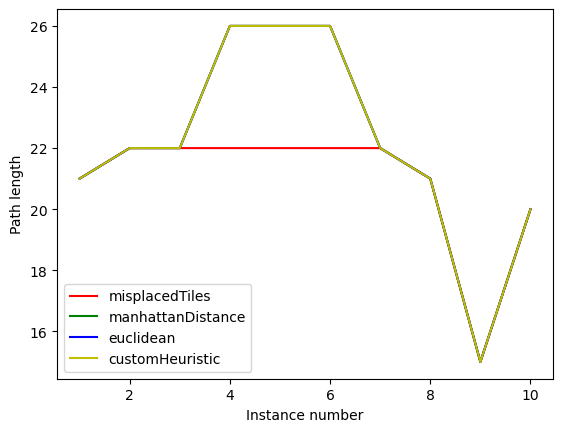

In [126]:
# plotting the path length for each heuristic
xpoints = [1,2,3,4,5,6,7,8,9,10]
misplacedTiles = []
manhattanDistance = []
euclidean = []
customHeuristic = []
for i in range(10):
    misplacedTiles.append(path_length[i][0])
    manhattanDistance.append(path_length[i][1])
    euclidean.append(path_length[i][2])
    customHeuristic.append(path_length[i][3])
plt.plot(xpoints, misplacedTiles, color = 'r',label = "misplacedTiles")
plt.plot(xpoints, manhattanDistance,color='g', label = "manhattanDistance")
plt.plot(xpoints, euclidean, color='b',label = "euclidean")
plt.plot(xpoints, customHeuristic,color='y', label = "customHeuristic")
plt.legend()
plt.xlabel("Instance number")
plt.ylabel("Path length")
plt.show()

The code given below was me trying to implement to disjoint pattern database heuristic but could not do it successfully as it is goes into an error or infinite loop.
Do not run the code given just below this, as it goes into an infinite loop. I have just attached it to ask for corrections in my code.

In [ ]:
# Do not run the following code. It will take a lot of time to run, or would go into infinite loop.
# I also tried to implement a heuristic function based on disjoint pattern database, but it was not working properly. I am attaching the code for that as well.
def getUniquePattern_1234(state):
    s = ""
    for i in range(3):
        for j in range(3):
            if state[i,j]==1 or state[i,j]==2 or state[i,j]==3 or state[i,j]==4 or state[i,j]==0:
                s+=str(state[i,j])
            else :
                s+='*'
    return s

def getUniquePattern_5678(state):
    s = ""
    for i in range(3):
        for j in range(3):
            if state[i,j]==5 or state[i,j]==6 or state[i,j]==7 or state[i,j]==8 or state[i,j]==0:
                s+=str(state[i,j])
            else :
                s+='*'
    return s

class HNode:
    def __init__(self, state, parent,cost):
        self.state = state
        self.parent = parent
        self.cost = cost
    def __lt__(self, other):
        return self.cost < other.cost
    def __eq__(self, other):
        if HNode == None or other == None:
            return False
        return self.cost == other.cost


def getNeighborsPattern(node):
    neighbors = []
    pstate = node.state
    for i in range(3):
        for j in range(3):
            if pstate[i,j] == 0:
                if i>0 :
                    newstate = pstate.copy()
                    newstate[i,j] = newstate[i-1,j]
                    newstate[i-1,j] = 0
                    neighbors.append(HNode(newstate, node, node.cost+1))
                if i<2 :
                    newstate = pstate.copy()
                    newstate[i,j] = newstate[i+1,j]
                    newstate[i+1,j] = 0
                    neighbors.append(HNode(newstate, node, node.cost+1))
                if j>0 :
                    newstate = pstate.copy()
                    newstate[i,j] = newstate[i,j-1]
                    newstate[i,j-1] = 0
                    neighbors.append(HNode(newstate, node, node.cost+1))
                if j<2: 
                    newstate = pstate.copy()
                    newstate[i,j] = newstate[i,j+1]
                    newstate[i,j+1] = 0
                    neighbors.append(HNode(newstate, node, node.cost+1))
    return neighbors

def createPatternDatabase(end):
    db = {}
    end_1234 = getUniquePattern_1234(end)
    end_node = HNode(end, None, 0)
    frontier = []
    frontier.append(end_node)
    explored = set()
    while len(frontier)>0:
        current = frontier.pop(0)
        current_key = getUniquePattern_1234(current.state)
        explored.add(current_key)
        db.update({current_key: current.cost})
        neighbors = getNeighborsPattern(current)
        for neighbor in neighbors:
            neighbor_key = getUniquePattern_1234(neighbor.state)
            if neighbor_key not in explored:
                frontier.append(neighbor) 
    end_5678 = getUniquePattern_5678(end)
    end_node = HNode(end, None, 0)
    frontier = []
    frontier.append(end_node)
    explored = set()
    while len(frontier)>0:
        current = frontier.pop(0)
        current_key = getUniquePattern_5678(current.state)
        explored.add(current_key)
        db.update({current_key: current.cost})
        neighbors = getNeighborsPattern(current)
        for neighbor in neighbors:
            neighbor_key = getUniquePattern_5678(neighbor.state)
            if neighbor_key not in explored:
                frontier.append(neighbor)      
    return db



def customHeuristic(state, db):
    #implementing disjoint pattern database
    h = 0
    #number of moves for 1 2 3 4
    key_1234 = getUniquePattern_1234(state)
    h += db[key_1234]
    #number of moves for 5 6 7 8
    key_5678 = getUniquePattern_5678(state)
    h += db[key_5678]
    return h

def getNeighborsCustom(node, heuristicFunc, db):
    neighbors = []
    pmove = node.move
    pstate = node.state
    for i in range(3):
        for j in range(3):
            if pstate[i,j] == 0:
                if i>0 and pmove!='d':
                    newstate = createState(pstate, 'u', i, j)
                    neighbors.append(Node(newstate, node, 'u', heuristicFunc(newstate, db), node.g+1))
                if i<2 and pmove!='u':
                    newstate = createState(pstate, 'd', i, j)
                    neighbors.append(Node(newstate, node, 'd', heuristicFunc(newstate, db), node.g+1))
                if j>0 and pmove!='r':
                    newstate = createState(pstate, 'l', i, j)
                    neighbors.append(Node(newstate, node, 'l', heuristicFunc(newstate, db), node.g+1))
                if j<2 and pmove!='l':
                    newstate = createState(pstate, 'r', i, j)
                    neighbors.append(Node(newstate, node, 'r', heuristicFunc(newstate, db), node.g+1))
    return neighbors

#a star using custom heuristic
def a_star(start, end, heuristicFunc, db):
    start_node = createNode(start, None, None, heuristicFunc(start, db), 0)
    q = PriorityQueue()
    q.put(start_node)
    start_key = getUnique(start_node.state)
    end_key = getUnique(end)
    explored = set()
    open = set()
    opend = {}
    opend.update({start_key: start_node.g})
    replace  = {}
    open.add(start_key)
    while not q.empty():
        current_node = q.get()
        current_key = getUnique(current_node.state)
        open.remove(current_key)
        opend.pop(current_key)
        if current_key in replace:
            g = replace[current_key]
            replace.pop(current_key)
            open.add(current_key)
            opend.update({current_key: g})
        explored.add(current_key)
        if end_key == current_key:
            return current_node
        neighbors = getNeighborsCustom(current_node, heuristicFunc, db)
        for neighbor in neighbors:
            neighbor_key = getUnique(neighbor.state)
            if (neighbor_key not in explored) and (neighbor_key not in open):
                q.put(neighbor)
                open.add(neighbor_key)
                opend.update({neighbor_key: neighbor.g})
            elif neighbor_key in open:
                if opend[neighbor_key] > neighbor.g:
                    replace.update({neighbor_key: neighbor.g})
                    q.put(neighbor)
                    opend.update({neighbor_key: neighbor.g})
                    
                    
    return None
    


print("Custom heuristic: ")
db = createPatternDatabase(end_state)
end_node_3 = a_star(initial_state, end_state, customHeuristic, db)
path3 = getPath(end_node_3)
for i in range(len(path3)):
    print(path3[i])